In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("../artifacts/raw_local_dir/data.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

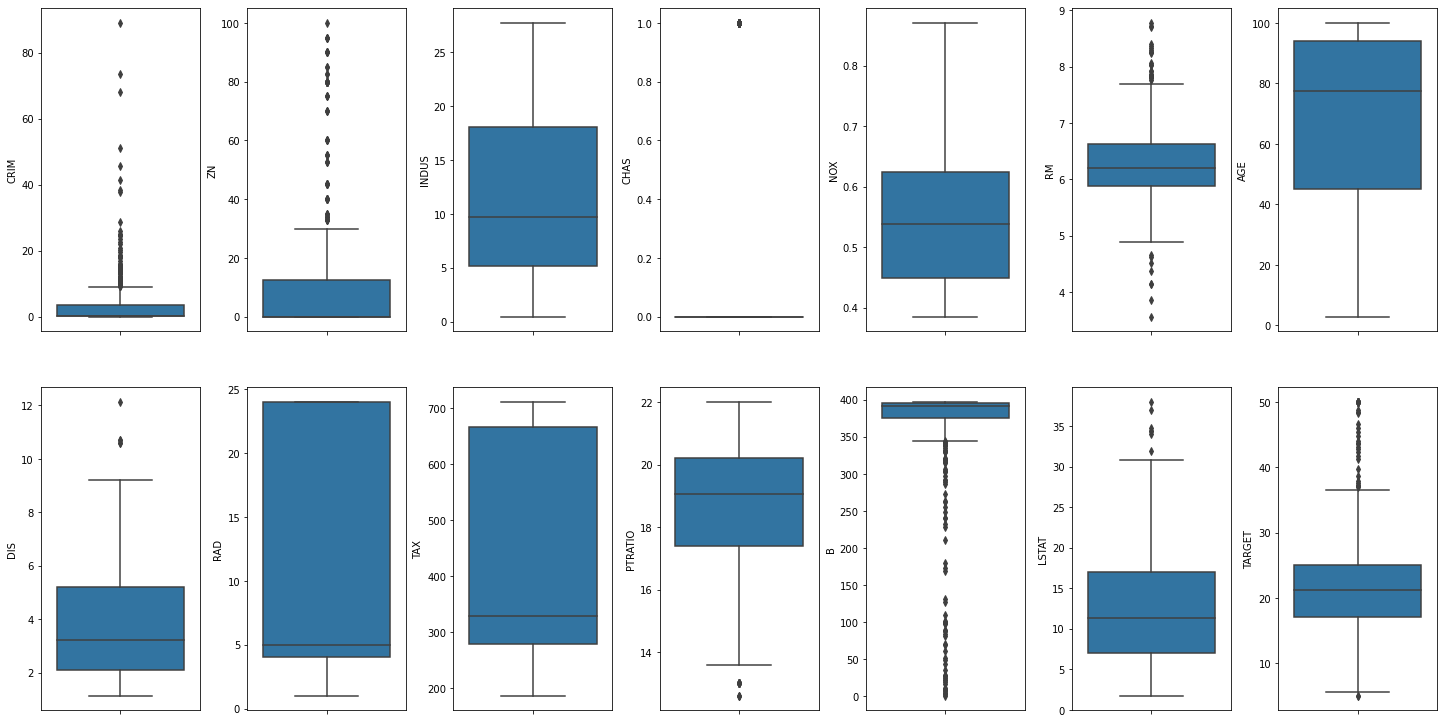

In [7]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mihir Dholakiya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

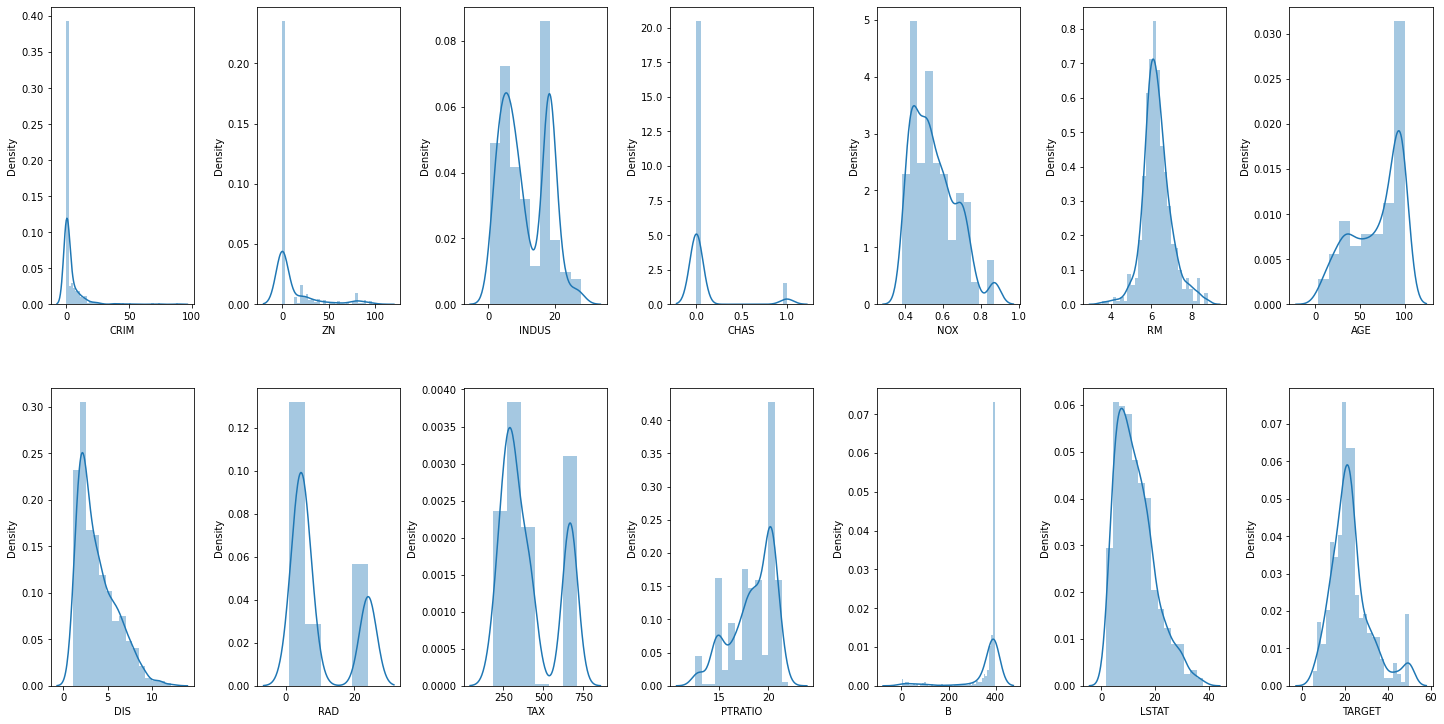

In [9]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [13]:
x = df.drop(["TARGET"], axis=1)
y = df['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

In [28]:
y_test

122    20.5
400     5.6
423    13.4
447    12.6
44     21.2
       ... 
492    20.1
440    10.5
134    15.6
363    16.8
174    22.6
Name: TARGET, Length: 152, dtype: float64

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(x_test)
y_pred

array([20.26132887, 11.12890007, 13.82627828, 18.13795816, 22.74068948,
       20.81362135, 37.06672084, 14.57964237, 23.18047766, 22.29283728,
       25.30760875, 37.28366292,  5.26162191, 25.54689587, 11.14149317,
       23.86701965, 17.53621385, 19.22877681, 32.30964337, 22.46328135,
       13.66494099, 19.84901793, 18.33905479, 18.58967918, 34.21945675,
       15.5474774 , 25.68842945, 25.01817805, 11.611136  , 34.6951032 ,
       16.40332985, 25.7936335 ,  4.9636998 , 15.87579626, 30.22113715,
       34.01330171, 25.36639356,  5.0435889 , 20.0914974 , 29.24920209,
       17.66206447, 13.68787519, 30.35709343, 15.74004133, 30.31485688,
       20.30855375, 21.86998166, 17.2791456 , 24.09261766, 21.15547882,
       17.34757262, 36.12785159, 10.52813864, 16.39129236, 24.76060752,
       14.05706367, 25.14308632, 15.23217452, 22.53938422, 23.78169103,
       16.895084  , 18.79193305, 35.81800064, 22.20600093, 17.97053995,
       25.29602065, 28.39118047, -0.76151906, 13.54367738, 30.23

In [30]:
rf = RandomForestRegressor()

In [31]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
y_pred2 = rf.predict(x_test)
y_pred2

array([18.794,  8.412, 13.113, 15.643, 22.071, 21.053, 29.57 , 14.532,
       32.485, 19.025, 30.519, 33.318,  9.699, 23.08 , 12.864, 24.368,
       15.319, 17.518, 30.742, 21.101, 15.14 , 28.964, 19.946, 18.732,
       31.182, 19.775, 22.106, 23.728, 11.045, 33.277, 14.775, 25.609,
        7.179, 20.322, 28.812, 32.846, 24.142, 10.505, 17.864, 23.683,
       12.089, 12.147, 33.094, 14.787, 25.586, 20.033, 17.433, 19.532,
       26.111, 21.129, 14.877, 33.687, 13.418, 14.211, 22.35 , 19.702,
       24.292, 14.275, 21.791, 21.962, 19.356, 15.5  , 43.513, 20.807,
       15.658, 25.105, 25.342, 10.619, 18.425, 30.078, 19.957, 17.859,
       14.637, 27.587, 18.238, 46.639, 15.013,  7.486, 16.169, 24.339,
       21.953, 14.351, 10.742, 26.815, 20.959, 21.298, 48.335, 14.768,
       45.708, 33.307, 32.09 , 20.334, 18.637, 16.566, 12.74 , 33.098,
       20.883, 22.676, 18.714, 18.426, 15.39 , 20.557, 28.518, 24.634,
       10.131, 13.99 ,  8.755, 25.346, 11.742, 25.7  , 38.962, 11.233,
      

In [34]:
print("Model Report LinearRegression")
print("MSE:",mean_squared_error(y_test, y_pred))
print("r2_score:",r2_score(y_test, y_pred))

Model Report LinearRegression
MSE: 22.79468703379869
r2_score: 0.6845848781125325


In [35]:
print("Model Report RandomForest")
print("MSE:",mean_squared_error(y_test, y_pred2))
print("r2_score:",r2_score(y_test, y_pred2))

Model Report RandomForest
MSE: 11.300280730263168
r2_score: 0.8436355182848687


In [38]:
print("RandomForest train accuracy",rf.score(x_train, y_train))
print("RandomForest test accuracy",rf.score(x_test, y_test))

RandomForest train accuracy 0.978024236035866
RandomForest test accuracy 0.8436355182848687


In [39]:
print("LinearRegression train accuracy",lr.score(x_train, y_train))
print("LinearRegression test accuracy",lr.score(x_test, y_test))

LinearRegression train accuracy 0.7540596363316301
LinearRegression test accuracy 0.6845848781125325
